In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from apyori import apriori

In [2]:
file = pd.read_csv('/home/ashish/Downloads/MBA/MBA_2/Dataset.csv')
file.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
file.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
file['Date'] = pd.to_datetime(file['Date'])
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


/tmp/ipykernel_13513/332793857.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  file['Date'] = pd.to_datetime(file['Date'])


In [6]:
file.isna().sum().sum()

0

In [7]:
file.shape

(38765, 3)

In [8]:
file.set_index('Date',inplace = True)
file.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


In [9]:
print('Total number of members :',len(np.unique(file['Member_number'])))
print('This data spanned for',len(np.unique(file.index.year)),'years')
print('Total number of items',len(np.unique(file.itemDescription)))

Total number of members : 3898
This data spanned for 2 years
Total number of items 167


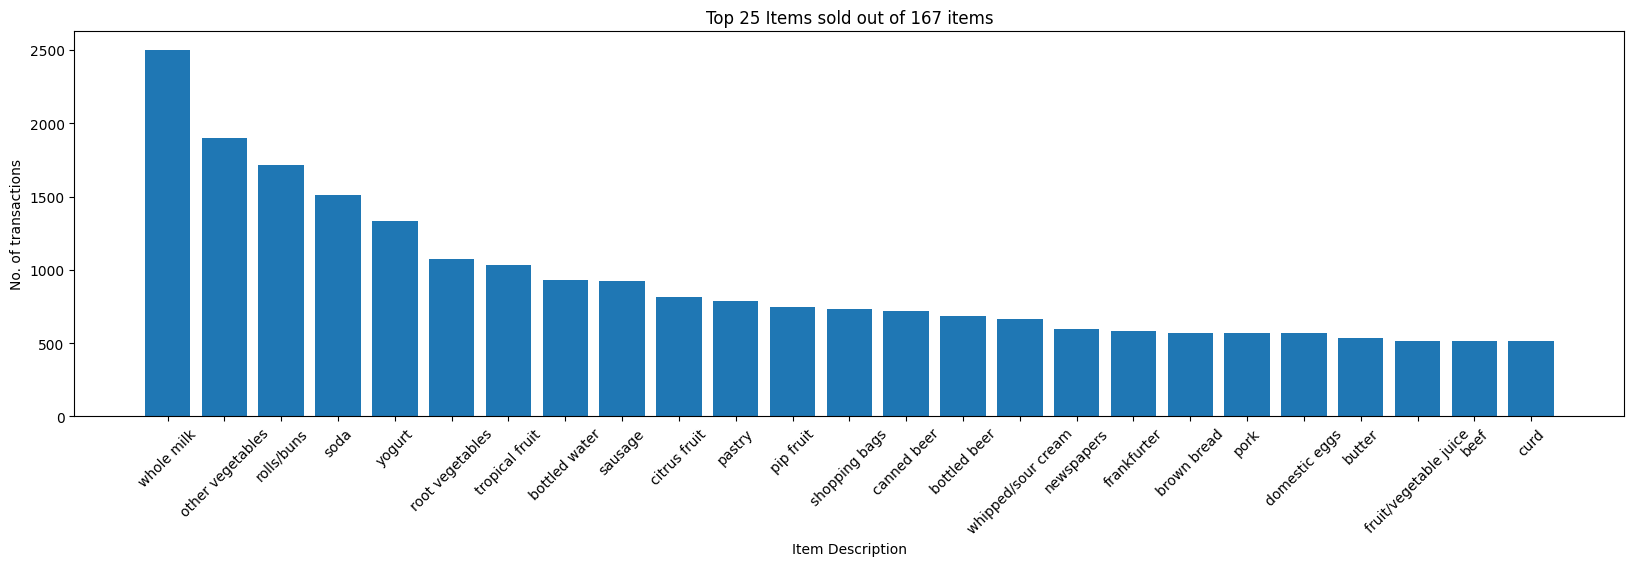

In [10]:
plt.figure(figsize=(20,5))
plt.bar(file['itemDescription'].value_counts().head(25).index,file['itemDescription'].value_counts().head(25).values)
plt.xlabel('Item Description')
plt.ylabel('No. of transactions')
plt.xticks(rotation = 45)
plt.title('Top 25 Items sold out of {} items'.format(len(np.unique(file.itemDescription))))
plt.show()

Looking at the graph, I will suggest that Whole Milk, Other Vegetables, Rolls/Buns, Soda, Yogurt and root vegetables needs to be always in the store. As these are the items with most transactions. 

In [11]:
file = file.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))
file.head(10)

Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
1001           2014-07-02                    [sausage, whole milk, rolls/buns]
               2014-12-12                                   [whole milk, soda]
               2015-01-20              [frankfurter, soda, whipped/sour cream]
               2015-02-05                                  [frankfurter, curd]
               2015-04-14                                  [beef, white bread]
Name: itemDescription, dtype: object

In [12]:
transc = file.values.tolist()
transc[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

Apriori Algorithm

In [13]:
rules = apriori(transc, min_support = 0.00030, min_confidence = 0.05, min_lift = 3, min_length = 2)
result = list(rules)
result[:10]

[RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'ham', 'pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'roll products ', 'meat'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'misc. beverages', 'salt'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

In [14]:
col = ['ItemSet','Support','Confidence','Lift']
row = []
for i in result:
    itemset = i[0]
    support = i[1]
    confidence = i[2][0][2]
    lift = i[2][0][3]
    row.append([itemset,support, confidence, lift])
ItemSet = pd.DataFrame(row, columns = col)
ItemSet

,ItemSet,Support,Confidence,Lift
0,"(fruit/vegetable juice, liver loaf)",0.000401,0.120000,3.527623
1,"(ham, pickled vegetables)",0.000535,0.059701,3.489506
2,"(roll products , meat)",0.000334,0.060976,3.620548
3,"(misc. beverages, salt)",0.000334,0.056180,3.561941
4,"(misc. beverages, spread cheese)",0.000334,0.050000,3.170127
5,"(seasonal products, soups)",0.000334,0.104167,14.704206
6,"(spread cheese, sugar)",0.000401,0.060000,3.387849
7,"(bottled beer, butter, sausage)",0.000334,0.200000,3.314064
8,"(hard cheese, bottled beer, whole milk)",0.000334,0.178571,3.940950
9,"(frozen vegetables, canned beer, brown bread)",0.000334,0.138889,4.959891


So, in this Itemset, we can analyse that

1. The Itemsets with confidence level greater than 0.25 or 25% (Id: 12,13,14,15,16,20,21,24,28,30,31) should be taken most care and should never be out of stock from the store as these have high probability of selling when grouped together. 
2. Analysing "Top 25 items out of 165 items" and above table, we get to know that the top 10 items are always in one of the transactions with confidence level greater than 25%. So, Both table and graph gives us an idea of the items that we need to keep in the store and to keep them in sufficient amount. 